# Forest Fire Prediction Model - Vegetation Analysis
This notebook analyzes vegetation-based features for forest fire prediction using Random Forest algorithm.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [14]:
# Load the dataset
df = pd.read_excel('Data/Veg/WildFire_Prediction_Data_Set.xlsx')

# Split the column name into separate columns
df.columns = ['combined']
df = pd.DataFrame([x.split(',') for x in df['combined']], 
                 columns=['NDVI', 'LST', 'BURNED_AREA', 'CLASS'])

# Convert numeric columns to float
df['NDVI'] = pd.to_numeric(df['NDVI'])
df['LST'] = pd.to_numeric(df['LST'])
df['BURNED_AREA'] = pd.to_numeric(df['BURNED_AREA'])

print("Dataset shape:", df.shape)
print("\nFirst few rows after preprocessing:")
print(df.head())

Dataset shape: (1713, 4)

First few rows after preprocessing:
       NDVI           LST  BURNED_AREA    CLASS
0  0.506782  14584.272727     4.692308  no_fire
1  0.522150  14655.833333     5.000000  no_fire
2  0.682284  14780.000000     5.000000     fire
3  0.120046  13298.500000     3.500000  no_fire
4  0.568734  14743.000000     5.000000  no_fire


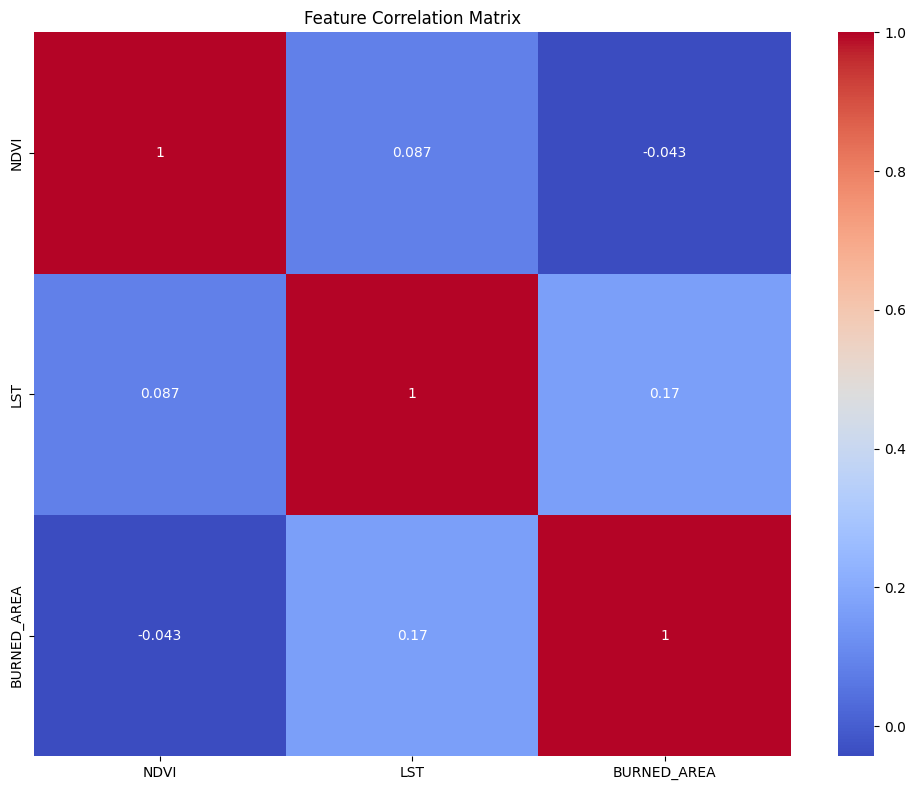


Class distribution:
CLASS
no_fire    1327
fire        386
Name: count, dtype: int64


In [16]:
# Correlation matrix (only numeric columns)
numeric_columns = ['NDVI', 'LST', 'BURNED_AREA']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display class distribution
print("\nClass distribution:")
print(df['CLASS'].value_counts())

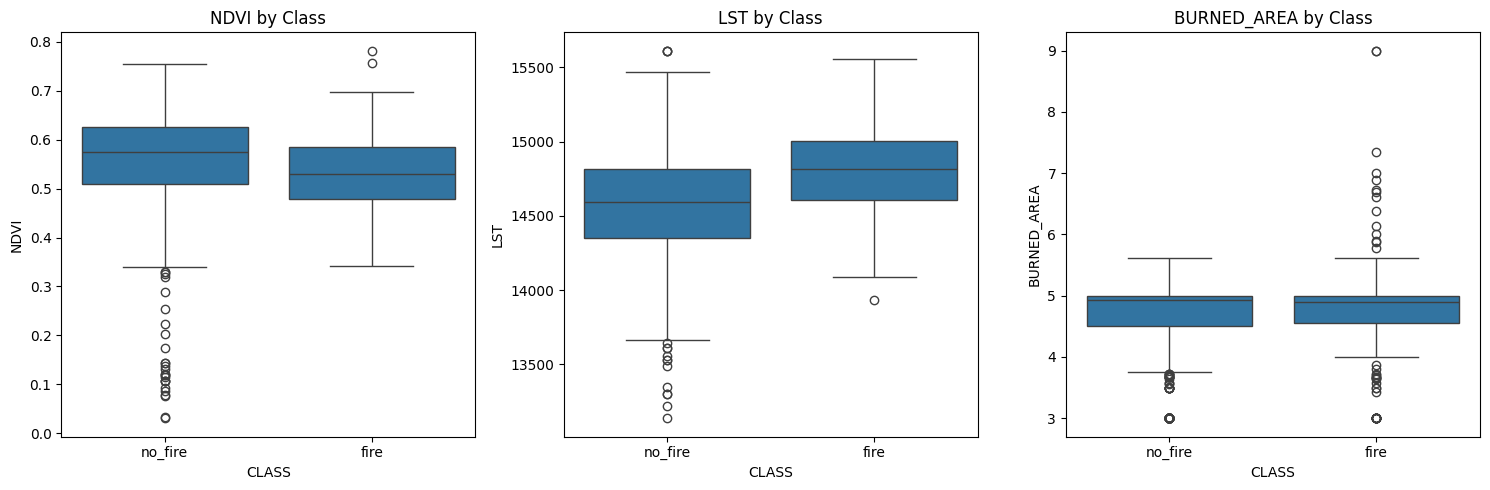

In [17]:
# Feature distributions by class
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='CLASS', y='NDVI', data=df)
plt.title('NDVI by Class')

plt.subplot(1, 3, 2)
sns.boxplot(x='CLASS', y='LST', data=df)
plt.title('LST by Class')

plt.subplot(1, 3, 3)
sns.boxplot(x='CLASS', y='BURNED_AREA', data=df)
plt.title('BURNED_AREA by Class')

plt.tight_layout()
plt.show()

In [18]:
# Prepare features and target
X = df[numeric_columns]  # Features
y = df['CLASS']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1370, 3)
Testing set shape: (343, 3)


In [19]:
# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of trees
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


In [20]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

        fire       0.68      0.38      0.49        68
     no_fire       0.86      0.96      0.91       275

    accuracy                           0.84       343
   macro avg       0.77      0.67      0.70       343
weighted avg       0.83      0.84      0.82       343



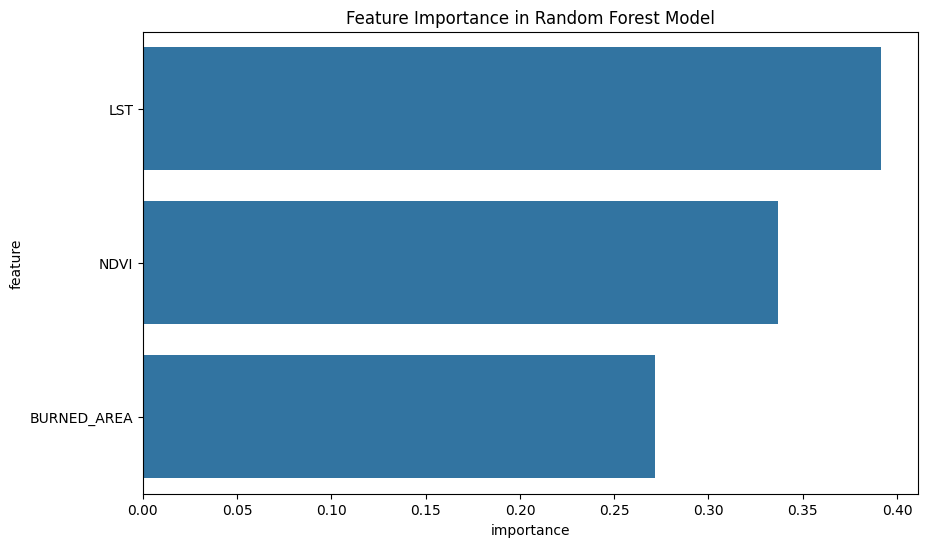


Feature Importance:
       feature  importance
1          LST    0.391517
0         NDVI    0.337052
2  BURNED_AREA    0.271432


In [21]:
# Calculate and plot feature importance
feature_importance = pd.DataFrame({
    'feature': numeric_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

In [22]:
# Save the model and label encoder
joblib.dump(rf_model, 'veg.joblib')
joblib.dump(le, 'veg_label_encoder.joblib')
print('\nModel saved as veg.joblib')
print('Label encoder saved as veg_label_encoder.joblib')


Model saved as veg.joblib
Label encoder saved as veg_label_encoder.joblib
